In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### System Parameters

In [13]:
m1 = 1.0     # mass1
m2 = 0.123  # mass2
G  = 1.0
D  = 1.0     # distance12

r1 = 6370/390000  # body radius mass 1
r2 = 1738/390000  # body radius mass 2

y1 = 0
y2 = 0

xmax =  1.5
xmin = -1.5
ymax =  1.5
ymin = -1.5

### Simplification - Circular orbits

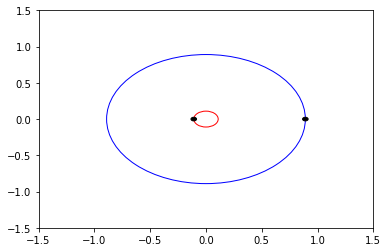

In [14]:
a1 = m2/(m1+m2)*D
a2 = m1/(m1+m2)*D

omega = np.sqrt(G*m2/(D*D*a1))

x1 = -a1
x2 = a2

circle1 = plt.Circle((0,0),a1,    fill=False,color='red')
circle1a= plt.Circle((x1,y1),0.025, fill=True, color='black')
circle2 = plt.Circle((0,0),a2,    fill=False,color='blue')
circle2a= plt.Circle((x2,y2),0.025, fill=True, color='black')

ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.add_artist(circle1)
ax.add_artist(circle1a)
ax.add_artist(circle2)
ax.add_artist(circle2a)

In [15]:
print('a1:'   ,round(a1,3))
print('a2:'   ,round(a2,3))
print('omega:',round(omega,3))

a1: 0.11
a2: 0.89
omega: 1.06


In [16]:
def calcTidalPotential(X,Y):
    m = 1
    Z = -G*m*m1/np.sqrt(np.square(X-x1)+np.square(Y-y1)) - G*m*m2/np.sqrt(np.square(X-x2)+np.square(Y-y2)) - 0.5*m*omega**2*(np.square(X)+np.square(Y))  
    return Z

x = np.arange(xmin, xmax, 0.01)
y = np.arange(ymin, ymax, 0.01)
X, Y = np.meshgrid(x, y)
Z = calcTidalPotential(X,Y)

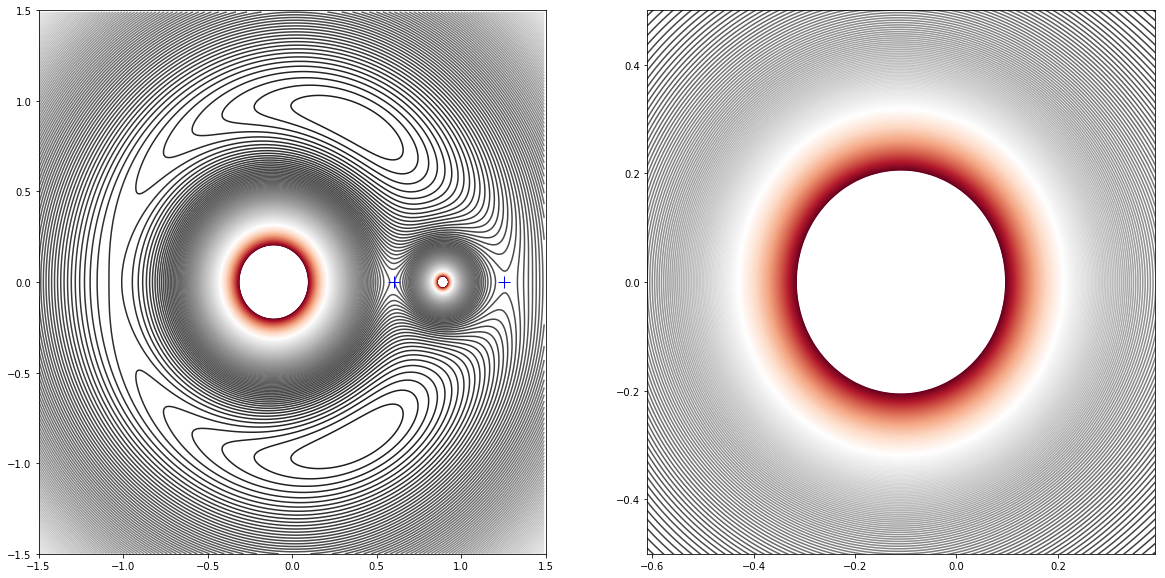

In [17]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,10))

ds     =   0.5
nLevel = 200
zMin   =  -5
zMax = np.max(Z)

ax1.set_xlim((xmin, xmax))
ax1.set_ylim((ymin, ymax))
ax1.contour(X,Y,Z,np.linspace(zMin,zMax,nLevel), cmap='RdGy')

mu = m2/(m1+m2)
rh = (mu/3)**(1/3)
ax1.plot([a2-D*rh*(1-rh/3-rh**2/9),a2+D*rh*(1+rh/3-rh**2/9)],[y2,y2],color='blue',marker='+',markersize=12,linewidth=0)

ax2.set_xlim((x1-ds, x1+ds))
ax2.set_ylim((y1-ds, y1+ds))
ax2.contour(X,Y,Z,np.linspace(zMin,zMax,nLevel), cmap='RdGy')

plt.show()

In [18]:
potSurface1a = calcTidalPotential(x1-r1, 0)
potSurface1b = calcTidalPotential(x1+r1, 0)
print(potSurface1a,potSurface1b)

potSurface2a = calcTidalPotential(x2-r2, 0)
potSurface2b = calcTidalPotential(x2+r2, 0)
print(potSurface2a,potSurface2b)

-61.35440785303079 -61.35440892522995
-29.045957523510356 -29.04595734650186


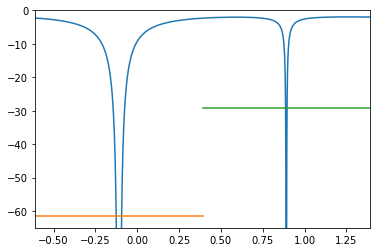

In [19]:
xPoints = np.linspace(xmin,xmax,10000)
yPoints = 0*xPoints
pot = calcTidalPotential(xPoints, yPoints)
plt.plot(xPoints, pot)
plt.plot([x1-ds,x1+ds],[potSurface1a,potSurface1a])
plt.plot([x2-ds,x2+ds],[potSurface2a,potSurface2a])
plt.ylim(-65,0);
plt.xlim(x1-ds,x2+ds);

0.01633333333333333


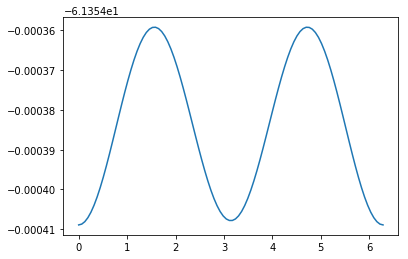

In [20]:
R       = r1
phi     = np.linspace(0,2*np.pi,100)
xPoints = x1 + R*np.cos(phi)
yPoints = y2 + R*np.sin(phi)
pot = calcTidalPotential(xPoints, yPoints)
plt.plot(phi, pot)
print(R)

In [12]:
maxPotVariance = max(pot)-min(pot)
maxPotVariance

4.973694643695126e-06